In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers

In [ ]:
Main_data = tf.keras.datasets.fashion_mnist #import the data
(train_img , train_lable) , (test_img , test_lable) = Main_data.load_data() #load the data

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
train_img.shape

(60000, 28, 28)

In [ ]:
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'] #give the label of the given data

In [ ]:
def show_img(x,y,index):
  temp = x[index].reshape((28,28))
  plt.imshow(temp,cmap = plt.cm.binary,interpolation='nearest')
  if isinstance(y, (int, float, complex, np.number)):
    plt.xlabel(class_name[index])
  else:
    plt.xlabel(class_name[y[index]])
  plt.grid(False)
  plt.show()

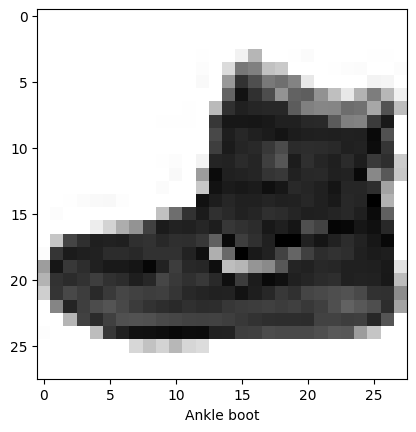

In [ ]:
show_img(train_img,train_lable,0)

In [ ]:
train_img = train_img.reshape((60000, 28, 28, 1)).astype('float32')
test_img = test_img.reshape((10000, 28, 28, 1)).astype('float32')
train_img, test_img = train_img / 255.0, test_img / 255.0

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape = (28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         147584    
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
              )

In [ ]:
compileation = model.fit(train_img,train_lable,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 4ms/step - loss: 0.4416 - accuracy: 0.8373
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2838 - accuracy: 0.8954
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2394 - accuracy: 0.9111
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2087 - accuracy: 0.9230
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1812 - accuracy: 0.9311
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1607 - accuracy: 0.9409
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1384 - accuracy: 0.9475
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1241 - accuracy: 0.9532
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1072 - accuracy: 0.9591
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.09

In [ ]:
test_acc ,test_loss= model.evaluate(test_img,test_lable)

313/313 [==============================] - 1s 3ms/step - loss: 0.3284 - accuracy: 0.9132


In [ ]:
prediction = model.predict(test_img)

313/313 [==============================] - 1s 2ms/step


In [ ]:
index = int(input('Enter The Number:'))
predicted_label = tf.argmax(tf.nn.softmax(prediction[index])).numpy()
show_img(test_img,test_lable,index)